# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [13]:
import kagglehub
import os
import pandas as pd
import warnings

from sklearn.preprocessing import quantile_transform
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [14]:
# Download latest version
path = kagglehub.dataset_download("rodolfomendes/abalone-dataset")
csv_file_path = os.path.join(path, "abalone.csv")

In [15]:
df = pd.read_csv(csv_file_path)
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


# EDA

In [16]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [17]:
df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [18]:
y = df['Rings']
X = df.drop(['Rings'], axis=1)

target distribution

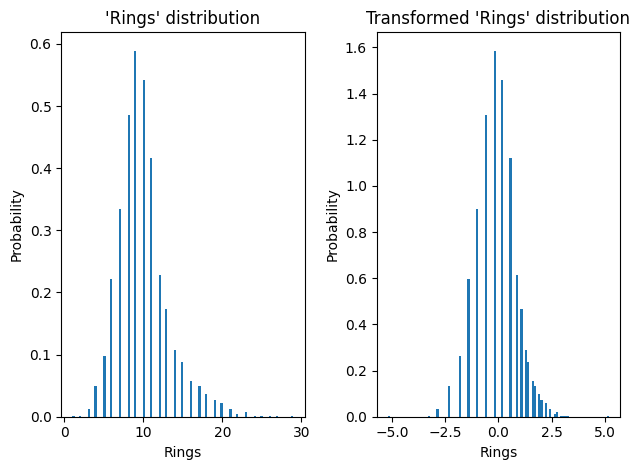

In [19]:
warnings.filterwarnings('ignore')

y_trans = quantile_transform(
    y.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, density=True)
ax0.set_ylabel("Probability")
ax0.set_xlabel("Rings")
ax0.set_title("'Rings' distribution")

ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Rings")
ax1.set_title("Transformed 'Rings' distribution")
plt.tight_layout()

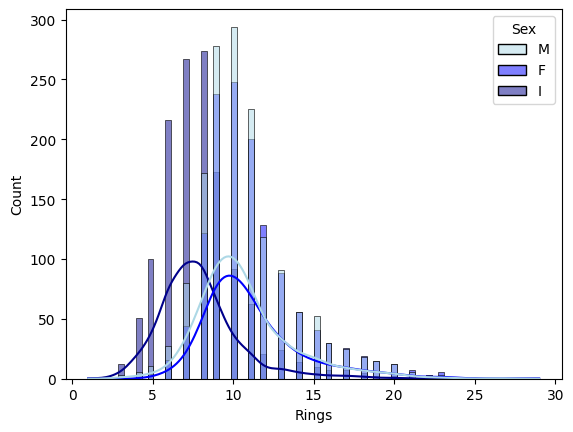

In [20]:
# the target variable distribution across sex

custom_palette = ["lightblue", "blue", "darkblue"]
sns.histplot(x='Rings', data=df, kde=True, hue='Sex', palette=custom_palette)
plt.show()

feature distribution

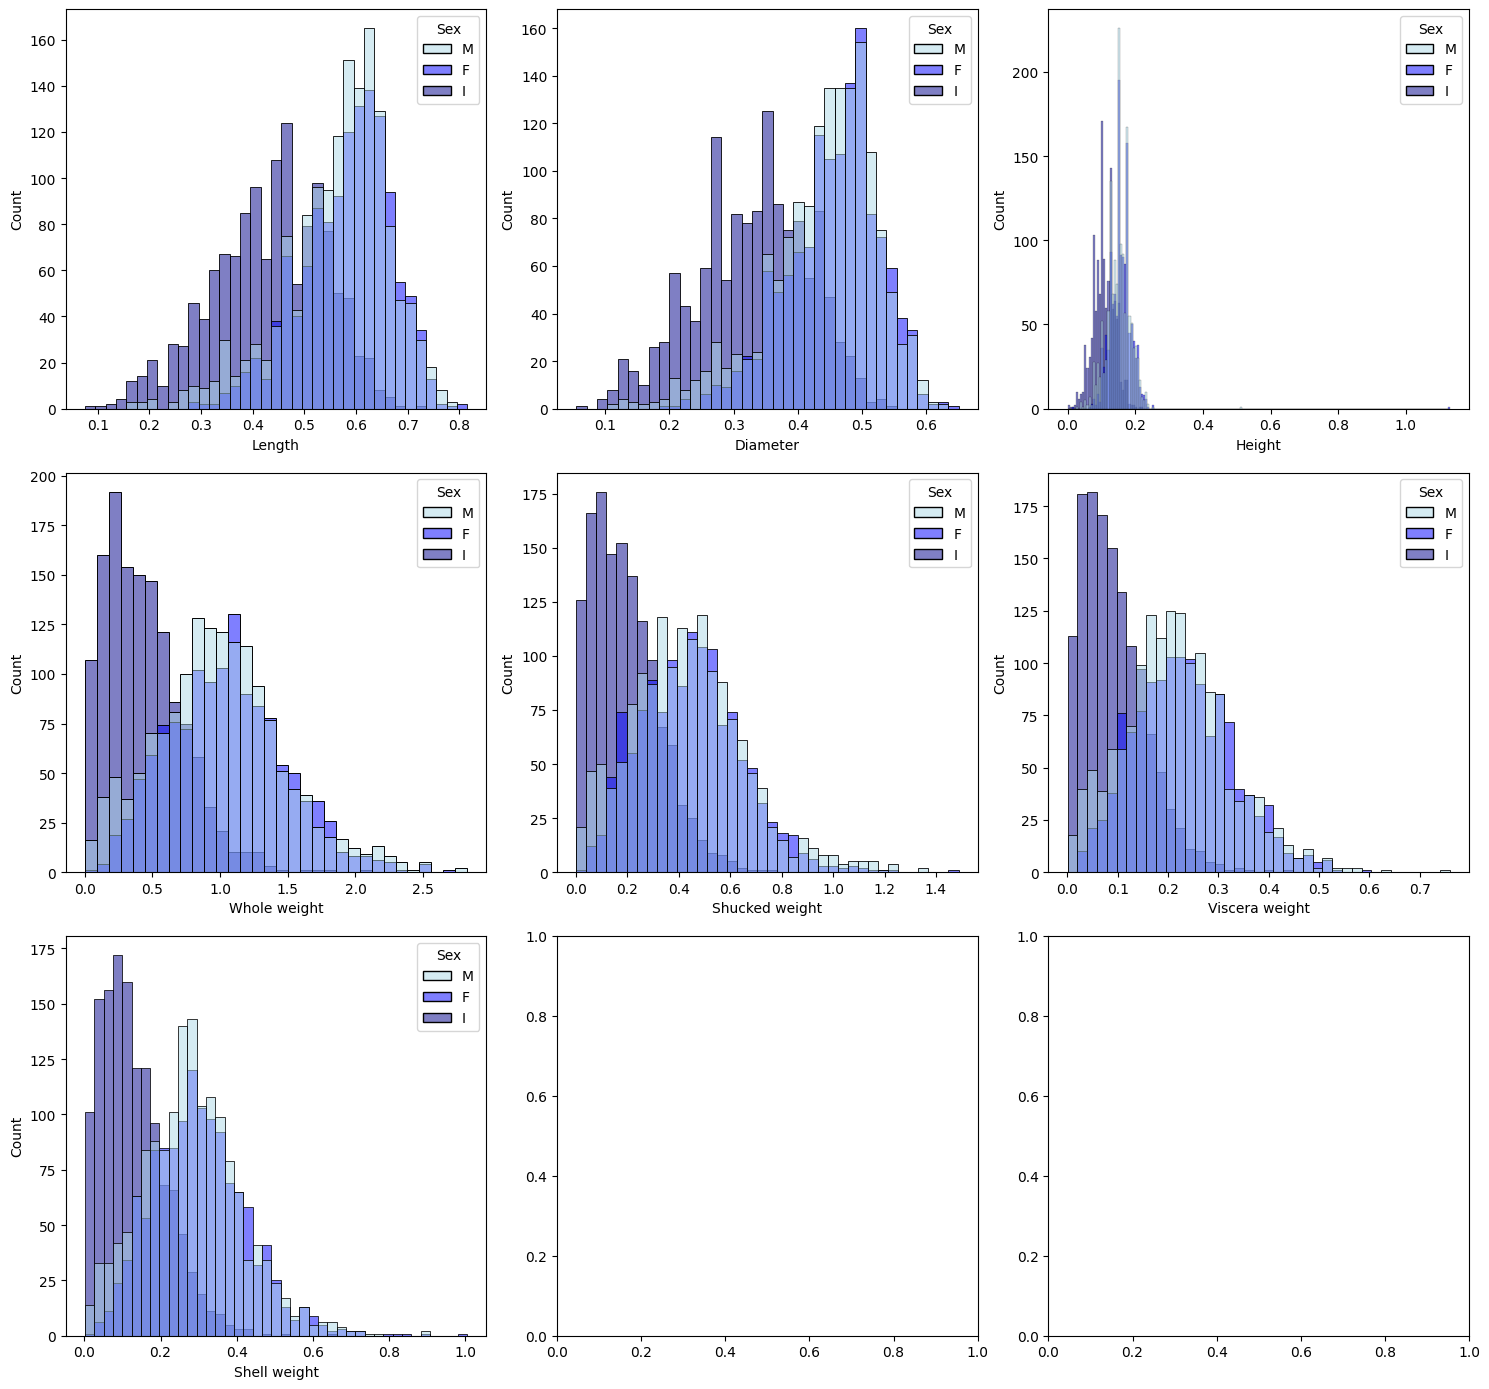

In [21]:
num_features = X.select_dtypes(exclude=object).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, len(num_features)*2))
# Base Features:
#fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, len(num_features)*2))

hue_order = [0, 1, 2] # get blue on top of green

for i, ax in enumerate(axes.flat):
    if i < len(num_features):
        sns.histplot(x=num_features[i], data=X, hue='Sex', palette=custom_palette, ax=ax)



# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

pair plot across all sex

<Figure size 1200x800 with 0 Axes>

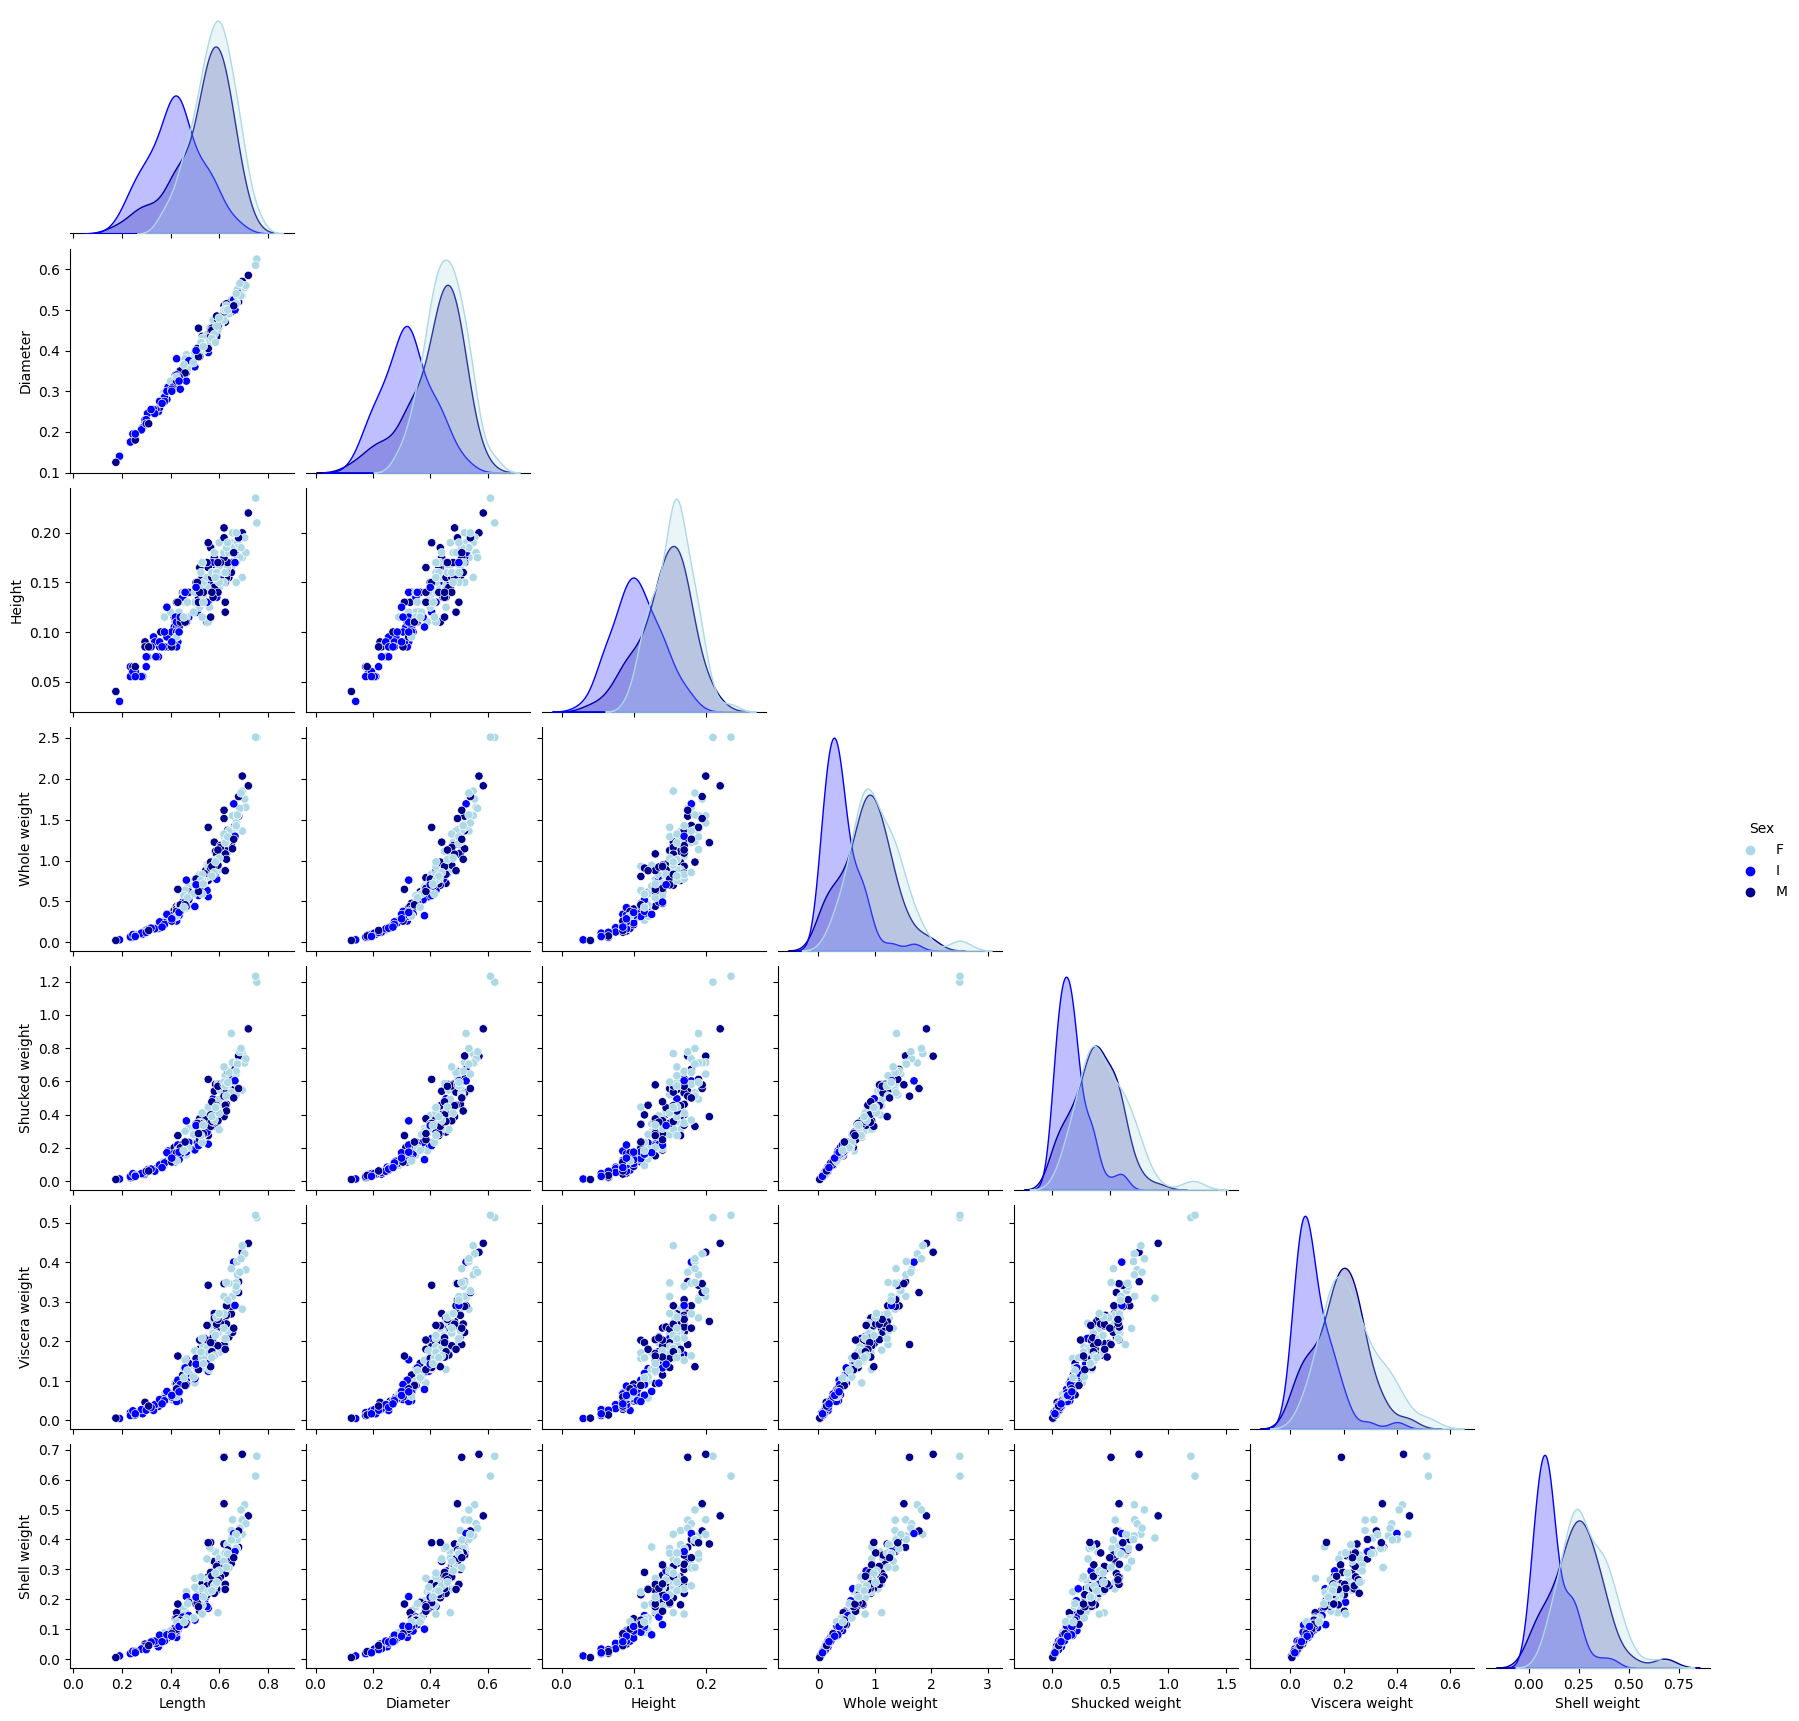

In [22]:
plt.figure(figsize=(12,8))
sns.pairplot(data=X.sample(frac=0.05), hue='Sex', palette=custom_palette, corner=True)
plt.show()